#### These tests are required to identify whether data is stationary or non stationary. ARIMA and SARIMA models assume that data is stationary.

- Stationary data refers to data whose statistical properties, like mean, variance, and autocorrelation, do not change over time. Essentially, the data's behavior remains consistent regardless of when it is observed.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [4]:
df = pd.read_csv('final_data.csv')

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

df_23 = df[df.DATE.dt.year == 2023]

df_23_gh = df_23[['DATE', 'gauge_height']]

In [6]:
df_23_gh.set_index('DATE', inplace=True)


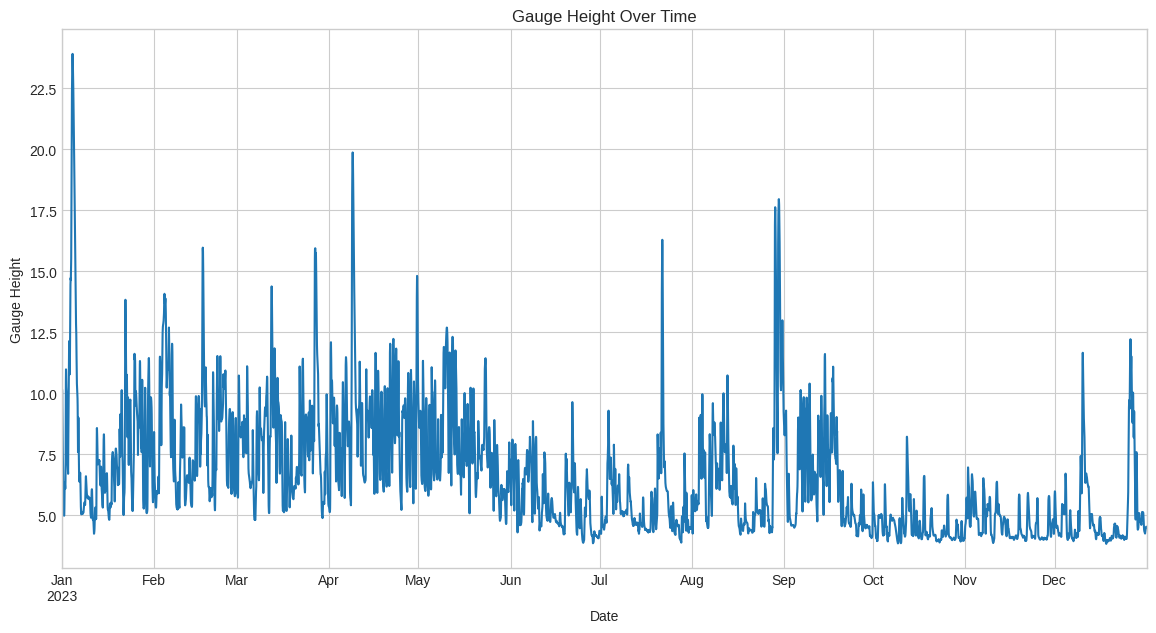

In [7]:
# First test is to see if there's clear trend or cycle on the data. We do this by visually plotting the data
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))
df_23_gh['gauge_height'].plot(ax=ax)
ax.set_title('Gauge Height Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Gauge Height')
plt.show()

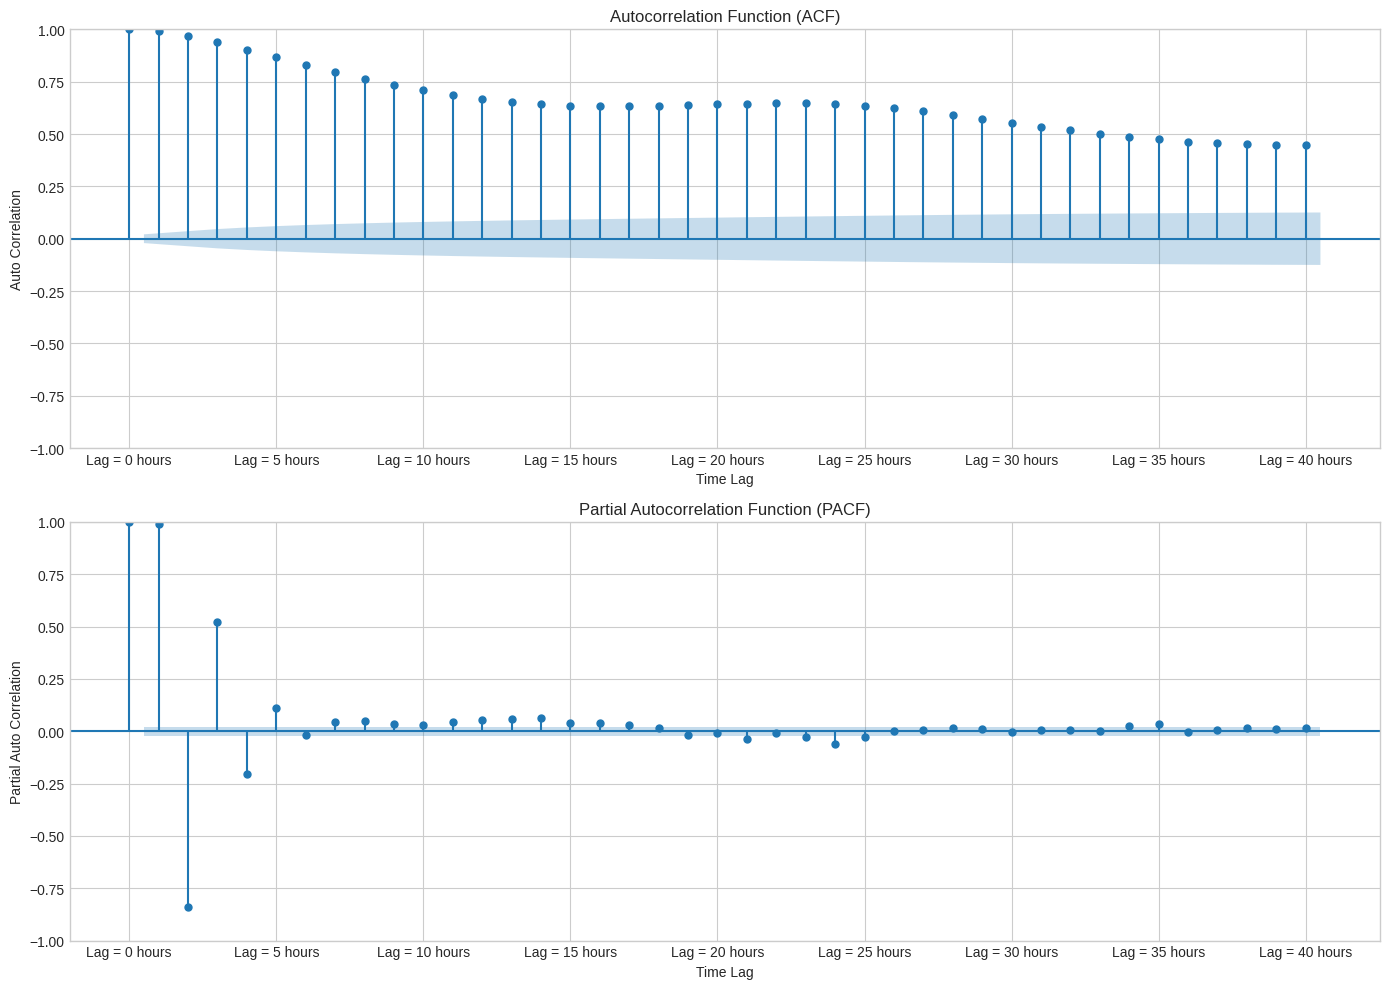

In [8]:
# Auto correlation and Partial correlation plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot ACF
plot_acf(df_23_gh['gauge_height'], ax=ax1, lags=40)
ax1.set_title('Autocorrelation Function (ACF)')
ax1.set_xlabel('Time Lag')
ax1.set_ylabel('Auto Correlation')
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'Lag = {int(x)} hours'))


# Plot PACF
plot_pacf(df_23_gh['gauge_height'], ax=ax2, lags=40, method='ywm')
ax2.set_title('Partial Autocorrelation Function (PACF)')
ax2.set_xlabel('Time Lag')
ax2.set_ylabel('Partial Auto Correlation')
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'Lag = {int(x)} hours'))

plt.tight_layout()
plt.show()

In [9]:
# Augmented Dickey Fueller Test

# We perform the test on the 'gauge_height' column
adf_result = adfuller(df_23_gh['gauge_height'])

# Extract the data and get results
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

print(f'ADF Statistic: {adf_statistic:.4f}')
print(f'p-value: {p_value:.4f}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'\t{key}: {value:.4f}')

# Null_Hypothesis (H_0) = The data is not stationary.
# Alternate_Hypothesis (H_a) = The data is stationary.
# If p-value < critical value, we reject the H_0 and if p-value > critical value, we fail to reject H_0.

# Interpret the results
if p_value > 0.05:
    print("\nConclusion: The p-value is greater than 0.05. We fail to reject the null hypothesis.")
    print("The data is likely NON-STATIONARY.")
else:
    print("\nConclusion: The p-value is less than or equal to 0.05. We reject the null hypothesis.")
    print("The data is likely STATIONARY.")

ADF Statistic: -7.1670
p-value: 0.0000
Critical Values:
	1%: -3.4311
	5%: -2.8619
	10%: -2.5669

Conclusion: The p-value is less than or equal to 0.05. We reject the null hypothesis.
The data is likely STATIONARY.


### Just for demonstration, we will do all the above tests for a non stationary dataset. The dataset is generated using sine function.

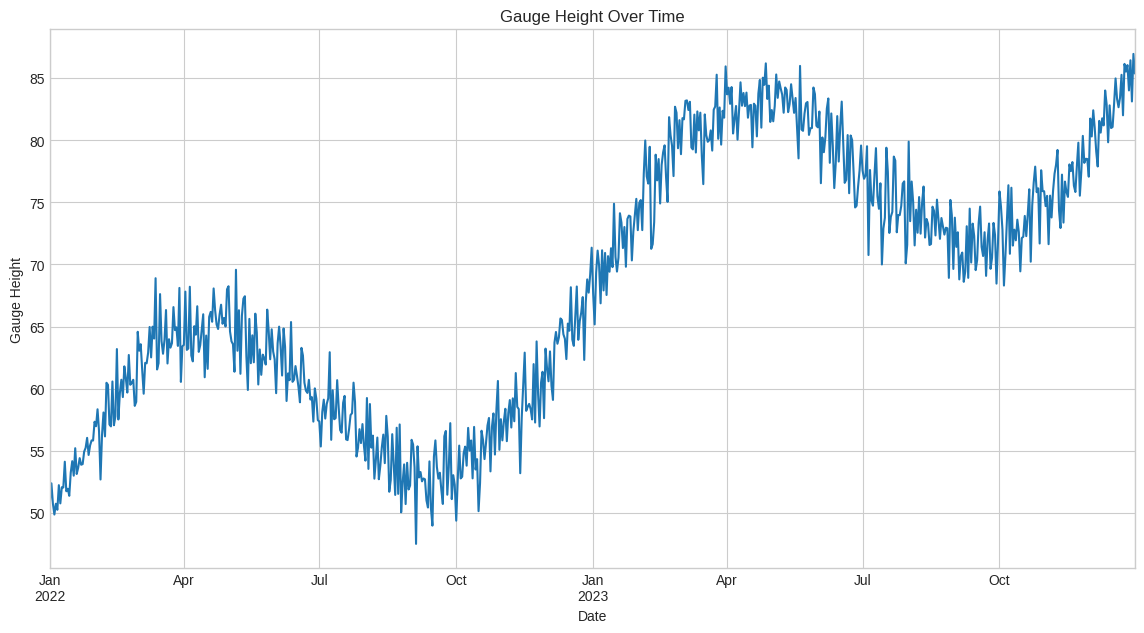


Autocorrelation and Partial Autocorrelation Plots


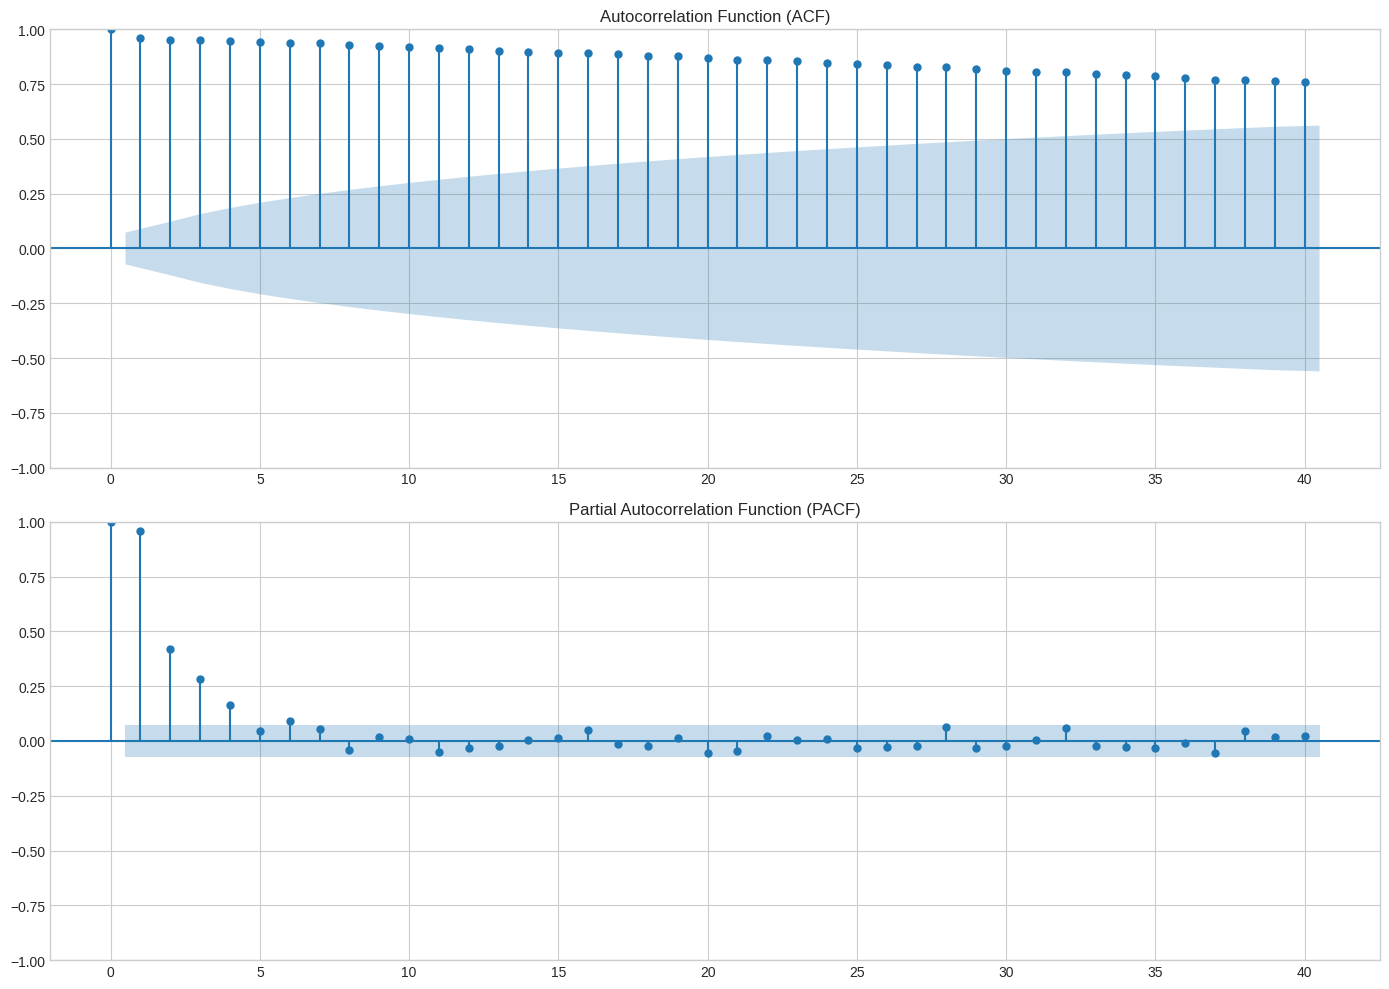


Observation:
ACF Plot: The autocorrelations are significantly positive for a large number of lags and decay very slowly. This is a classic sign of non-stationarity.
PACF Plot: The PACF shows a very strong correlation at lag 1, further confirming the presence of a trend.

--- Augmented Dickey-Fuller Test ---
ADF Statistic: -0.6933
p-value: 0.8485
Critical Values:
	1%: -3.4396
	5%: -2.8656
	10%: -2.5689

Conclusion: The p-value is greater than 0.05. We fail to reject the null hypothesis.
The data is likely NON-STATIONARY.


In [10]:
date_rng = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
data = {
    'DATE': date_rng,
    # Creating a trend (linear increase) and seasonality (sine wave for yearly cycle)
    'gauge_height': np.arange(len(date_rng)) * 0.05 + \
                    np.sin(np.arange(len(date_rng)) * (2 * np.pi / 365.25)) * 10 + \
                    np.random.randn(len(date_rng)) * 2 + 50 # Add some noise and a baseline
}
df_23_gh = pd.DataFrame(data)
df_23_gh.set_index('DATE', inplace=True)

# Visual Inspection of the Time Series
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))
df_23_gh['gauge_height'].plot(ax=ax)
ax.set_title('Gauge Height Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Gauge Height')
plt.show()


# Plot ACF and PACF
# These plots help determine the correlation structure of the time series.
# For non-stationary data, the ACF plot shows a slow decay.
print("\nAutocorrelation and Partial Autocorrelation Plots")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot ACF
plot_acf(df_23_gh['gauge_height'], ax=ax1, lags=40)
ax1.set_title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(df_23_gh['gauge_height'], ax=ax2, lags=40, method='ywm')
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

print("\nObservation:")
print("ACF Plot: The autocorrelations are significantly positive for a large number of lags and decay very slowly. This is a classic sign of non-stationarity.")
print("PACF Plot: The PACF shows a very strong correlation at lag 1, further confirming the presence of a trend.")


# Augmented Dickey-Fuller (ADF) Test
# This is a statistical test for stationarity.
# Null Hypothesis (H0): The series is non-stationary (it has a unit root).
# Alternative Hypothesis (H1): The series is stationary.
print("\n--- Augmented Dickey-Fuller Test ---")

# Perform the test on the 'gauge_height' column
adf_result = adfuller(df_23_gh['gauge_height'])

# Extract and print the results
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

print(f'ADF Statistic: {adf_statistic:.4f}')
print(f'p-value: {p_value:.4f}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'\t{key}: {value:.4f}')

# Interpret the results
if p_value > 0.05:
    print("\nConclusion: The p-value is greater than 0.05. We fail to reject the null hypothesis.")
    print("The data is likely NON-STATIONARY.")
else:
    print("\nConclusion: The p-value is less than or equal to 0.05. We reject the null hypothesis.")
    print("The data is likely STATIONARY.")
